# Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.naive_bayes import BernoulliNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score,auc,accuracy_score

# Loading Data

In [2]:
df_train = pd.read_csv('Data/train.csv')
df_test = pd.read_csv('Data/test.csv')
gender_sub = pd.read_csv('Data/gender_submission.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print(df_train.isnull().sum())
print(df_test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


# Data Visualization

          Class 1  Class 2  Class 3
Survived      136       87      119
Dead           80       97      372


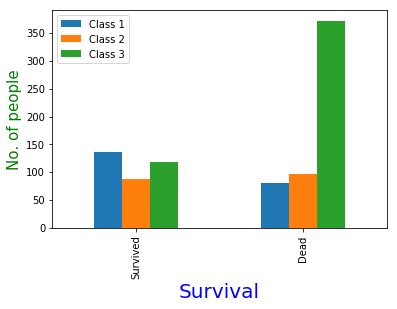

In [6]:
#Visualization by Class columns
survived_pclass = df_train[df_train['Survived'] == 1]['Pclass'].value_counts()
dead_pclass = df_train[df_train['Survived'] == 0]['Pclass'].value_counts()

df_class=pd.DataFrame([survived_pclass,dead_pclass])
df_class.columns = ['Class 1','Class 2', 'Class 3']
df_class.index = ['Survived', 'Dead']
print(df_class)
df_class.plot(kind='bar')
plt.ylabel('No. of people',size=15,color='green')
plt.xlabel('Survival',size=20,color='blue')
plt.show()

          Female  Male
Survived     233   109
Dead          81   468


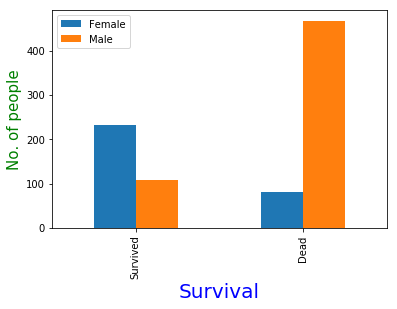

In [7]:
#Visualization by Sex columns
survived_sex = df_train[df_train['Survived'] == 1]['Sex'].value_counts()
dead_sex = df_train[df_train['Survived'] == 0]['Sex'].value_counts()

df_sex=pd.DataFrame([survived_sex,dead_sex])
df_sex.columns = ['Female','Male']
df_sex.index = ['Survived', 'Dead']
print(df_sex)
df_sex.plot(kind='bar')
plt.ylabel('No. of people',size=15,color='green')
plt.xlabel('Survival',size=20,color='blue')
plt.show()

      AgeGroup  Survived
0         Baby  0.704545
1        Child  0.360000
2     Teenager  0.428571
3      Student  0.347826
4  Young Adult  0.404545
5        Adult  0.400000
6       Senior  0.227273


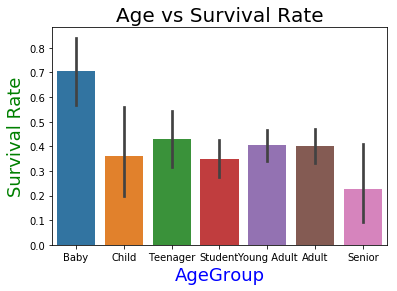

In [8]:
#Visualization by Age columns
bins = [ 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = [ 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
df_train['AgeGroup'] = pd.cut(df_train["Age"], bins, labels = labels)
print(df_train[['AgeGroup','Survived']].groupby(['AgeGroup'],as_index=False).mean())
sns.barplot(x="AgeGroup",y="Survived",data=df_train)
plt.xlabel('AgeGroup',color='blue',size=18)
plt.ylabel('Survival Rate',color='green',size=18)
plt.title('Age vs Survival Rate',color='Black',size=20)
plt.show()

In [9]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult


            Class  Survived
0  Economic Class  0.366950
1  Business Class  0.727273
2     First Class  0.777778


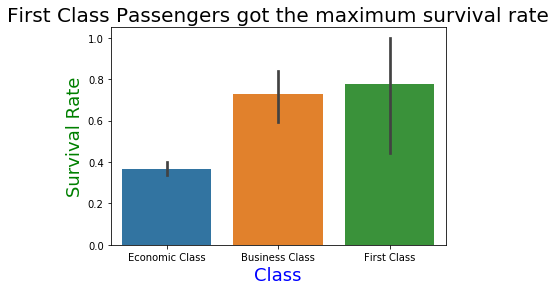

In [10]:
#Visualization and classification based on Fare
bins = [0,100,250,600]
labels=['Economic Class','Business Class','First Class']
df_train['Class']=pd.cut(df_train['Fare'],bins,labels=labels)
print(df_train[['Class','Survived']].groupby(['Class'],as_index=False).mean())
sns.barplot(x="Class",y="Survived",data=df_train)
plt.xlabel('Class',color='blue',size=18)
plt.ylabel('Survival Rate',color='green',size=18)
plt.title('First Class Passengers got the maximum survival rate',color='Black',size=20)
plt.show()

            S   C   Q
Survived  217  93  30
Dead      427  75  47


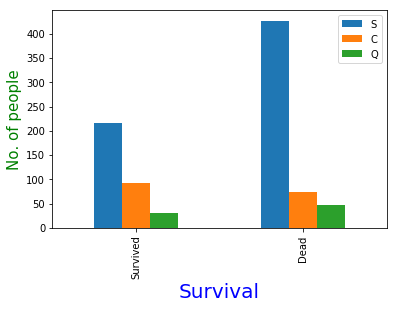

In [11]:
#Visualization by Embarked columns
survived_embarked = df_train[df_train['Survived'] == 1]['Embarked'].value_counts()
dead_embarked = df_train[df_train['Survived'] == 0]['Embarked'].value_counts()

df_embarked=pd.DataFrame([survived_embarked,dead_embarked])
df_embarked.columns = ['S','C', 'Q']
df_embarked.index = ['Survived', 'Dead']
print(df_embarked)
df_embarked.plot(kind='bar')
plt.ylabel('No. of people',size=15,color='green')
plt.xlabel('Survival',size=20,color='blue')
plt.show()

# Data cleaning

### Training Data

In [12]:
#As Cabin cloums as 70-80% of missing data. PassengerId and ticket coumns does not make any sense. Dropping Cabin,PassengerId and Ticket column.
df_train.dropna()
train = df_train.drop(['Cabin','Ticket','PassengerId','Name'], axis=1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Class
0,0,3,male,22.0,1,0,7.2500,S,Student,Economic Class
1,1,1,female,38.0,1,0,71.2833,C,Adult,Economic Class
2,1,3,female,26.0,0,0,7.9250,S,Young Adult,Economic Class
3,1,1,female,35.0,1,0,53.1000,S,Young Adult,Economic Class
4,0,3,male,35.0,0,0,8.0500,S,Young Adult,Economic Class


In [13]:
train[train['Class']=='First Class']

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Class
27,0,1,male,19.0,3,2,263.0000,S,Student,First Class
88,1,1,female,23.0,3,2,263.0000,S,Student,First Class
258,1,1,female,35.0,0,0,512.3292,C,Young Adult,First Class
311,1,1,female,18.0,2,2,262.3750,C,Teenager,First Class
341,1,1,female,24.0,3,2,263.0000,S,Student,First Class
438,0,1,male,64.0,1,4,263.0000,S,Senior,First Class
679,1,1,male,36.0,0,1,512.3292,C,Adult,First Class
737,1,1,male,35.0,0,0,512.3292,C,Young Adult,First Class
742,1,1,female,21.0,2,2,262.3750,C,Student,First Class


In [14]:
train['Embarked'].fillna('S',inplace = True)

In [15]:
train['Embarked'] = train['Embarked'].map( {'S': 1, 'C': 2,'Q':3} ).astype(int)

In [16]:
train['Sex'] = train['Sex'].map( {'female': 1, 'male':0} ).astype(int)

In [17]:
train['Age'].fillna(np.mean(train['Age']), inplace=True)

In [18]:
train = train.drop(['AgeGroup'], axis=1)

In [19]:
bins = [ 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = [ 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)

In [20]:
train.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
Embarked     0
Class       15
AgeGroup     0
dtype: int64

In [21]:
train['AgeGroup'].value_counts()

train['AgeGroup'] = train['AgeGroup'].map( { 'Baby':0, 'Child':1, 'Teenager':2, 'Student':3, 'Young Adult':4, 'Adult':5, 'Senior':6} ).astype(int)
#{ 'Baby':0, 'Child':1, 'Teenager':2, 'Student':3, 'Young Adult':4, 'Adult':5, 'Senior':6}

In [22]:
train['Class'].fillna('First Class', inplace=True)

In [23]:
train['Class'].value_counts()

train['Class'] = train['Class'].map( {'Economic Class':0,'Business Class':1,'First Class':2} ).astype(int)
# {'Economic Class':0,'Business Class':1,'First Class':2}

In [24]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Class,AgeGroup
0,0,3,0,22.0,1,0,7.2500,1,0,3
1,1,1,1,38.0,1,0,71.2833,2,0,5
2,1,3,1,26.0,0,0,7.9250,1,0,4
3,1,1,1,35.0,1,0,53.1000,1,0,4
4,0,3,0,35.0,0,0,8.0500,1,0,4


### Testing Data

In [25]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [26]:
df_test.dropna()
test = df_test.drop(['Cabin','Ticket','PassengerId','Name'], axis=1)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [27]:
test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [28]:
test['Embarked'] = test['Embarked'].map( {'S': 1, 'C': 2,'Q':3} ).astype(int)

In [29]:
test['Sex'] = test['Sex'].map( {'female': 1, 'male':0} ).astype(int)

In [30]:
test['Age'].fillna(np.mean(test['Age']), inplace=True)

In [31]:
test['Fare'].fillna(np.mean(test['Fare']), inplace=True)

In [32]:
bins = [ 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = [ 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

In [33]:
test['AgeGroup'].value_counts()

test['AgeGroup'] = test['AgeGroup'].map( { 'Baby':0, 'Child':1, 'Teenager':2, 'Student':3, 'Young Adult':4, 'Adult':5, 'Senior':6} ).astype(int)
#{ 'Baby':0, 'Child':1, 'Teenager':2, 'Student':3, 'Young Adult':4, 'Adult':5, 'Senior':6}

In [34]:
# test = test.drop(['Class'], axis=1)
# test.head()

In [35]:
bins = [0,100,250,np.inf]
labels=['Economic Class','Business Class','First Class']
test['Class']=pd.cut(test['Fare'],bins,labels=labels)

In [36]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
AgeGroup    0
Class       2
dtype: int64

In [37]:
print(test[test['Class'].isnull()]['Class'])

266    NaN
372    NaN
Name: Class, dtype: category
Categories (3, object): [Economic Class < Business Class < First Class]


In [38]:
print(test.iloc[[266]])
print(test.iloc[[372]])

     Pclass  Sex       Age  SibSp  Parch  Fare  Embarked  AgeGroup Class
266       1    0  30.27259      0      0   0.0         1         4   NaN
     Pclass  Sex   Age  SibSp  Parch  Fare  Embarked  AgeGroup Class
372       1    0  49.0      0      0   0.0         1         5   NaN


In [39]:
test['Class'].fillna('Economic Class', inplace=True)

In [40]:
test['Class'].value_counts()

test['Class'] = test['Class'].map( {'Economic Class':0,'Business Class':1,'First Class':2} ).astype(int)
# {'Economic Class':0,'Business Class':1,'First Class':2}

In [41]:
train = train.drop(['Survived'], axis=1)

# Build a Model

In [42]:
#Logistic Regression
logreg = LogisticRegression(C=2)
logreg.fit(train, df_train['Survived'])

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
y_pred_log = logreg.predict(test)

print(logreg.score(train, df_train['Survived']))

test_score_log = logreg.score(test,gender_sub['Survived'])
test_score_log

0.8069584736251403


0.777511961722488

In [44]:
parameters = {'C': range(1,10,1)}
grid =GridSearchCV(logreg, parameters, cv=5)

In [45]:
grid.fit(train, df_train['Survived'])

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1, param_grid={'C': range(1, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [46]:
grid.best_params_

{'C': 1}

In [47]:
grid.best_score_

0.7946127946127947

# Scaling the data

In [48]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [49]:
train[['Fare']] = MinMaxScaler().fit_transform(train[['Fare']])
test[['Fare']] = MinMaxScaler().fit_transform(test[['Fare']])

In [50]:
logreg = LogisticRegression()
logreg.fit(train, df_train['Survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [51]:
y_pred_log = logreg.predict(test)

print(logreg.score(train, df_train['Survived']))


0.8103254769921436


In [52]:
#Random Forest Classifier
ran_clf = RandomForestClassifier(n_estimators=40)
ran_clf.fit(train, df_train['Survived'])

y_pred_ran = ran_clf.predict(test)

print(ran_clf.score(train, df_train['Survived']))


0.9820426487093153


In [53]:
#Bagging Classifier
bg = BaggingClassifier(DecisionTreeClassifier(),max_features=0.6, max_samples=0.5, n_estimators=1000)
bg.fit(train, df_train['Survived'])

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=0.6,
         max_samples=0.5, n_estimators=1000, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [54]:
y_pred_bg = bg.predict(test)

In [55]:
y_pred_bg

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [56]:
print(bg.score(train, df_train['Survived']))

0.9337822671156004


In [57]:
bg.score(test,gender_sub['Survived'])

0.7727272727272727

In [58]:
#Boosting Algorithm
adbost = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=5, learning_rate=1)
adbost.fit(train, df_train['Survived'])

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1, n_estimators=5, random_state=None)

In [59]:
y_pred_adbost = adbost.predict(test)

In [60]:
print(adbost.score(train, df_train['Survived']))

0.9820426487093153


In [61]:
#Submission to kaggle
submission = pd.DataFrame({'PassengerId':df_test['PassengerId'],'Survived':y_pred_bg})
submission.head(5)
filename = 'submission_titanic_adbost.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: submission_titanic_adbost.csv


In [62]:
#Spilting the data for predicting the result
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train,df_train['Survived'], test_size=0.2,random_state=22)

In [63]:
log = LogisticRegression().fit(X_train,y_train)

In [64]:
log.score(X_train,y_train)

0.8117977528089888

In [65]:
log.score(X_test,y_test)

0.776536312849162

In [66]:
pred = log.predict(X_test)

In [67]:
print(classification_report(y_test, pred))
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(accuracy_score(y_test, pred))

             precision    recall  f1-score   support

          0       0.80      0.85      0.82       110
          1       0.73      0.67      0.70        69

avg / total       0.77      0.78      0.77       179



[[93 17]
 [23 46]]


0.776536312849162


In [68]:
ran_clf = RandomForestClassifier(n_estimators=100)
ran_clf.fit(X_train,y_train)

y_pred_ran = ran_clf.predict(X_test)


In [69]:
ran_clf.score(X_train,y_train)

0.9845505617977528

In [70]:
print(classification_report(y_test, y_pred_ran))
print('\n')
print(confusion_matrix(y_test, y_pred_ran))
print('\n')
print(accuracy_score(y_test, y_pred_ran))

             precision    recall  f1-score   support

          0       0.83      0.85      0.84       110
          1       0.75      0.72      0.74        69

avg / total       0.80      0.80      0.80       179



[[93 17]
 [19 50]]


0.7988826815642458


In [71]:
adbost = AdaBoostClassifier()
adbost.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [72]:
adbost.score(X_train,y_train)

0.851123595505618

In [73]:
y_pred_adabost = adbost.predict(X_test)

In [74]:
print(classification_report(y_test, y_pred_adabost))
print('\n')
print(confusion_matrix(y_test, y_pred_adabost))
print('\n')
print(accuracy_score(y_test, y_pred_adabost))

             precision    recall  f1-score   support

          0       0.80      0.80      0.80       110
          1       0.68      0.68      0.68        69

avg / total       0.75      0.75      0.75       179



[[88 22]
 [22 47]]


0.7541899441340782


In [75]:
from xgboost import XGBClassifier

In [76]:
classifier =  XGBClassifier(n_estimators=4, learning_rate=0.05,n_jobs=-1)

In [77]:
# classifier.fit(X_train, y_train)
# # # pred3 = classifier.predict(X_test)

In [78]:
bg = BaggingClassifier(DecisionTreeClassifier(),max_features=0.6, max_samples=0.5, n_estimators=1000)
bg.fit(train, df_train['Survived'])

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=0.6,
         max_samples=0.5, n_estimators=1000, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [79]:
bg.score(X_train,y_train)

0.9339887640449438

In [80]:
bg.score(X_test,y_test)

0.9441340782122905

In [81]:
y_pred_bg = bg.predict(X_test)

In [82]:
print(classification_report(y_test, y_pred_bg))
print('\n')
print(confusion_matrix(y_test, y_pred_bg))
print('\n')
print(accuracy_score(y_test, y_pred_bg))

             precision    recall  f1-score   support

          0       0.92      1.00      0.96       110
          1       1.00      0.86      0.92        69

avg / total       0.95      0.94      0.94       179



[[110   0]
 [ 10  59]]


0.9441340782122905
